In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main

/content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main


In [7]:
!ls

contour.jpg  demo2.jpeg  Vehical_Collection				  yolov8s.pt
data	     demo.jpeg	 yolov8n.pt
data.yaml    runs	 Yolov8_object_detection_on_custom_dataset.ipynb


In [8]:
%cd //content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

In [9]:
!ls runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1700286717.836b0ccd8e3a.6028.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch270.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch271.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch272.jpg	   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


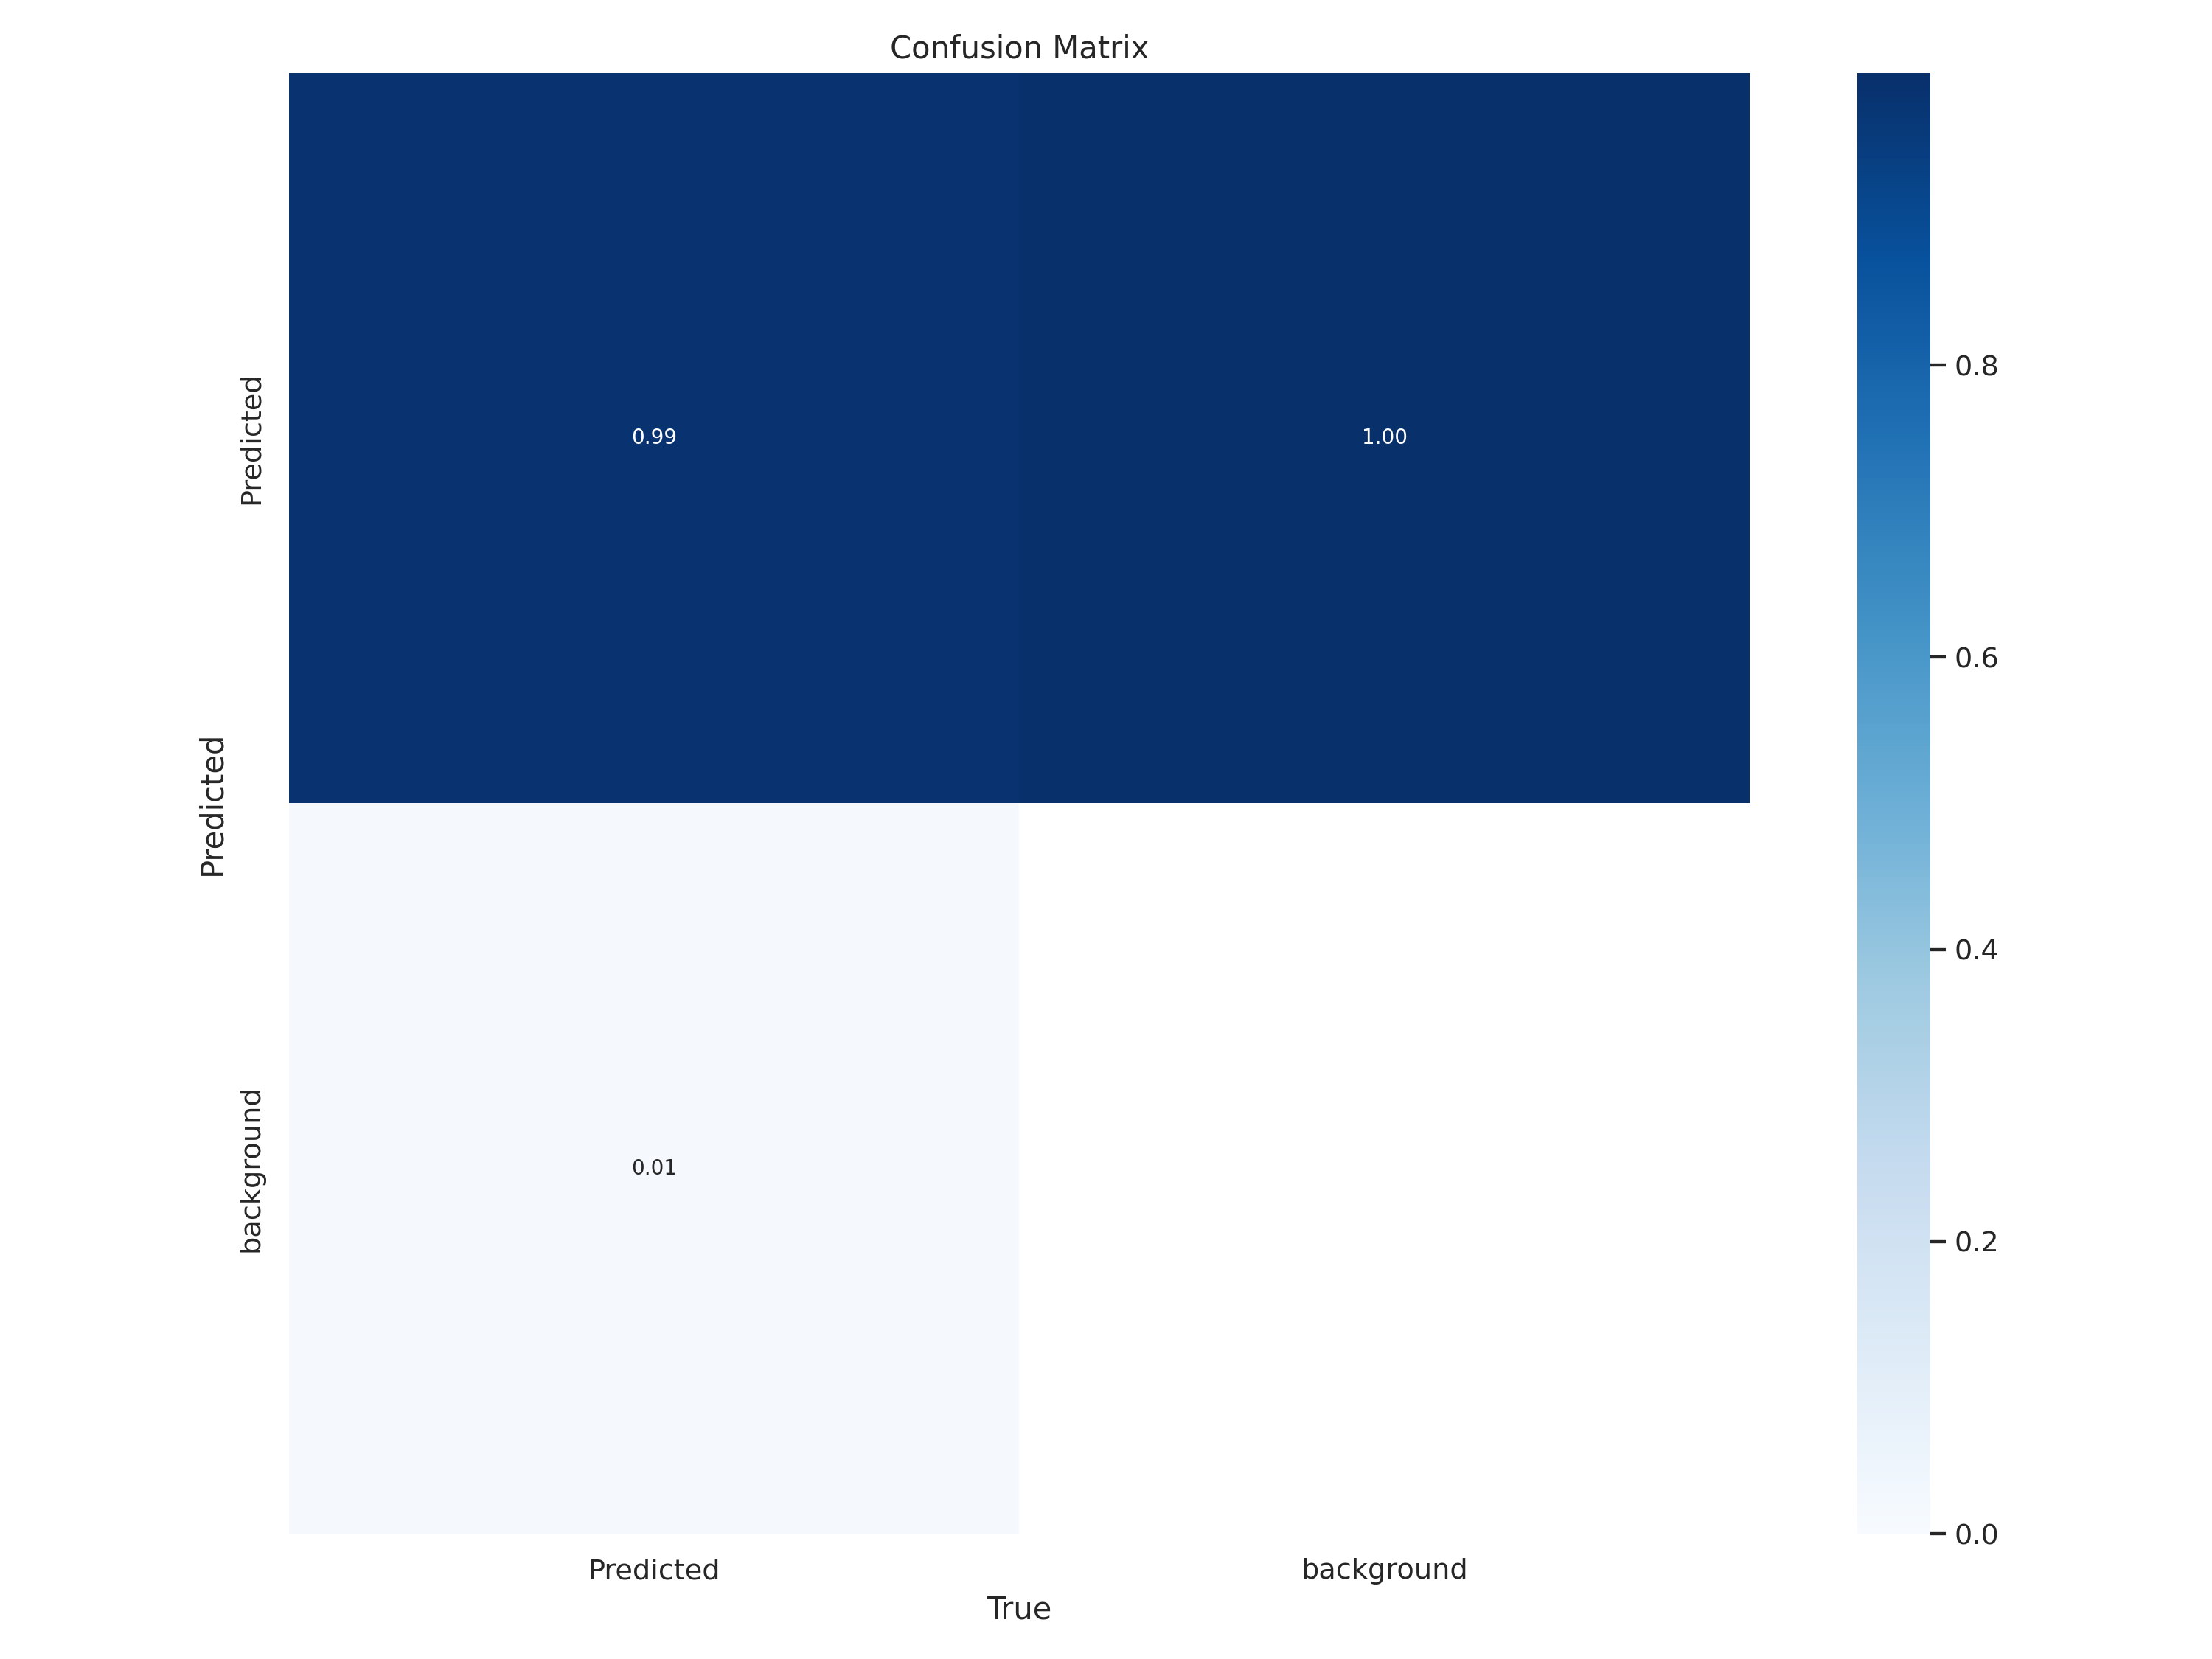

In [10]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

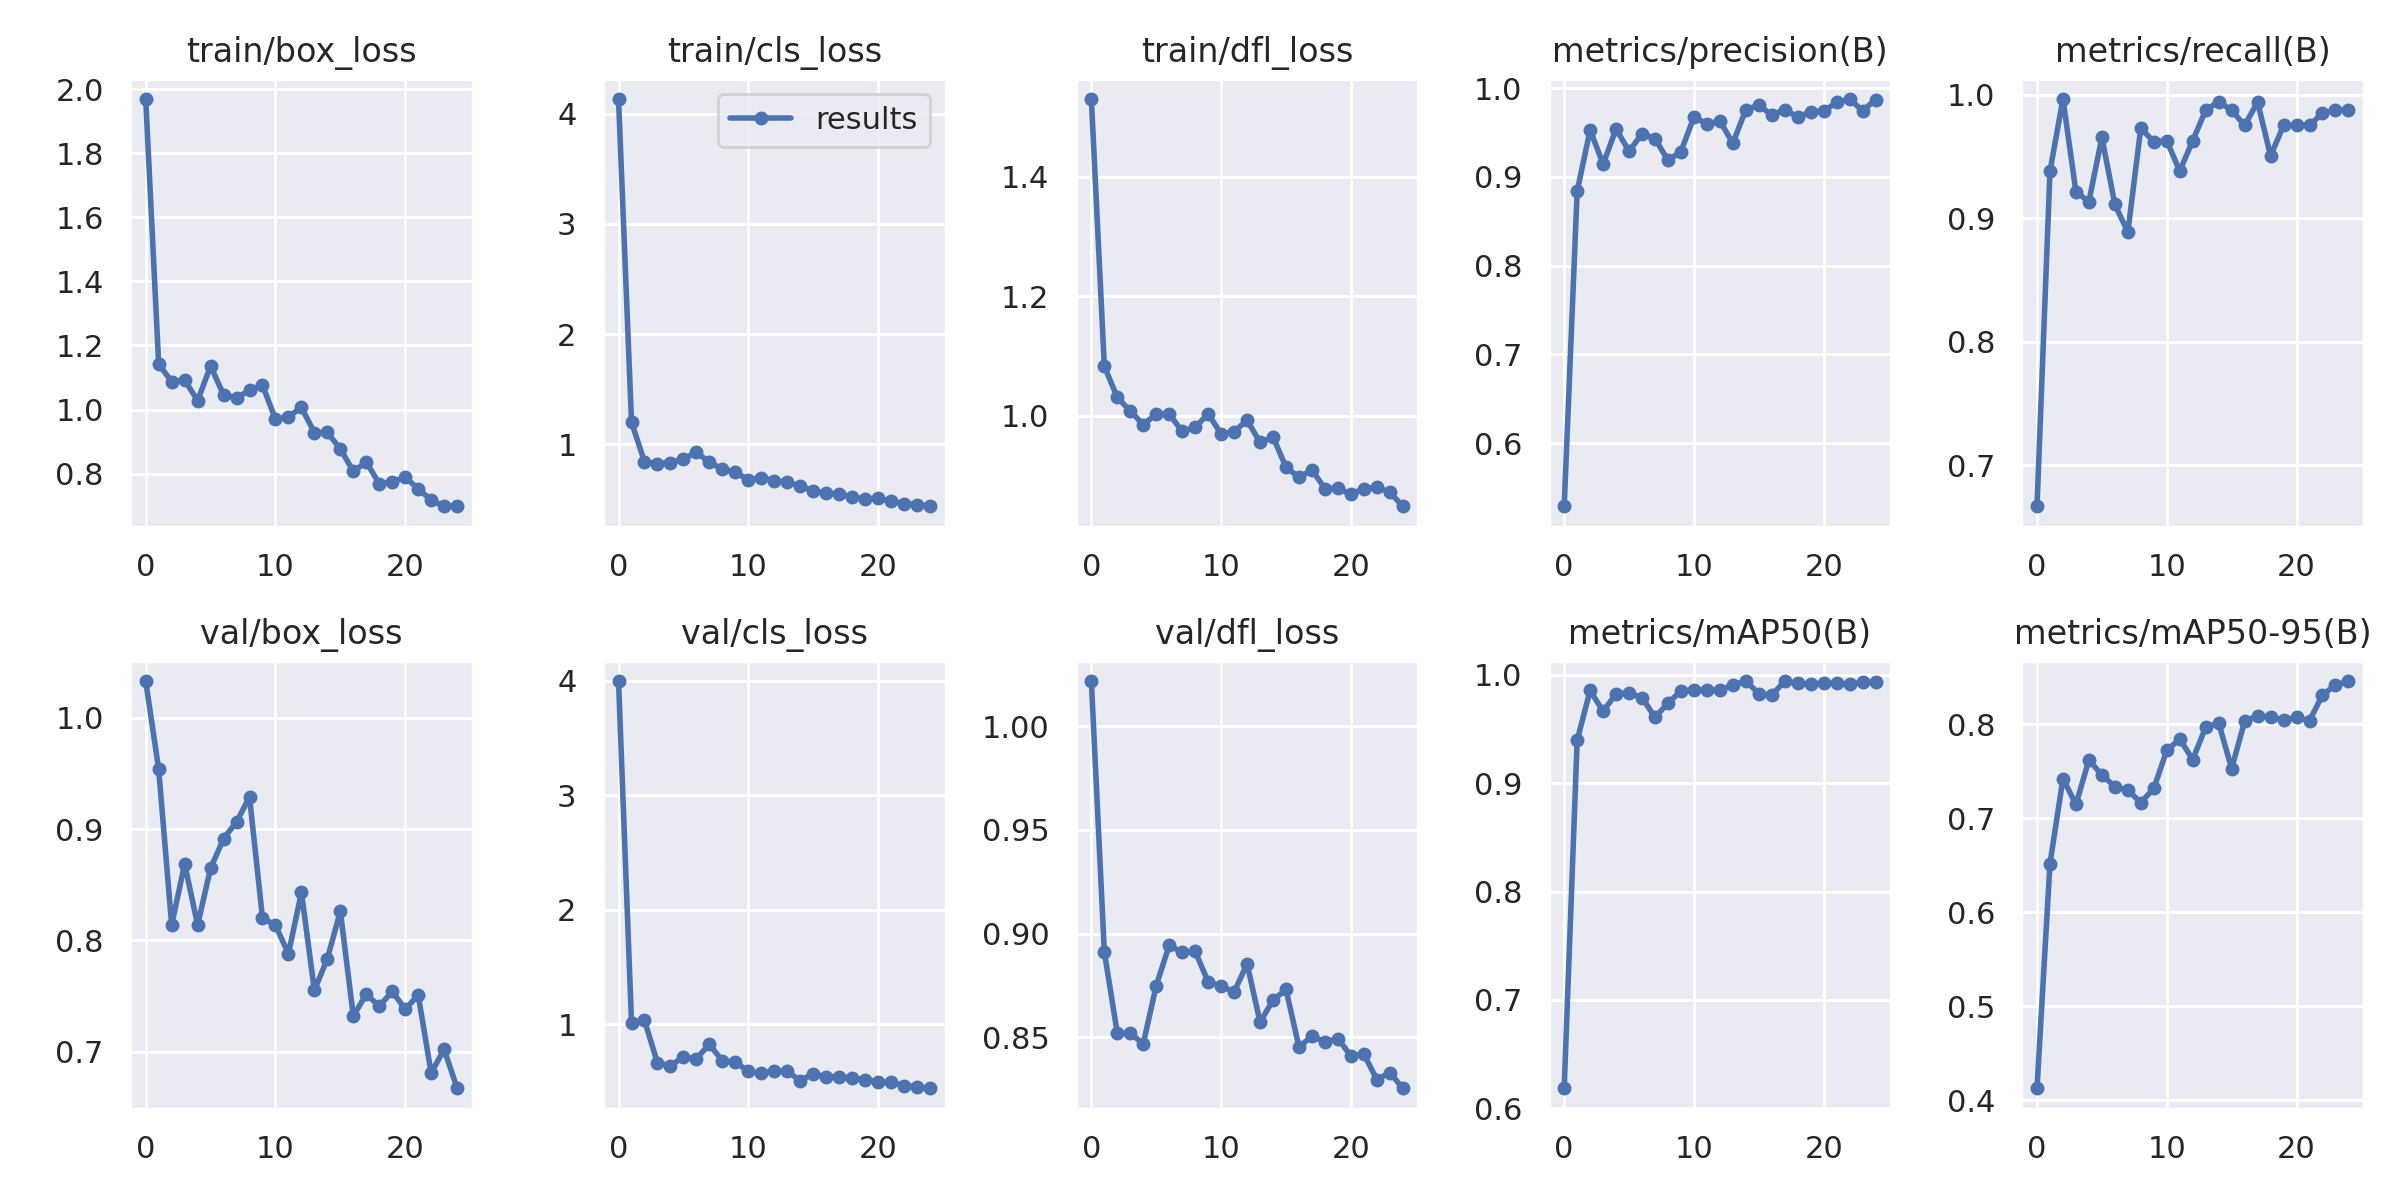

In [11]:
Image(filename='runs/detect/train/results.png', width=600)

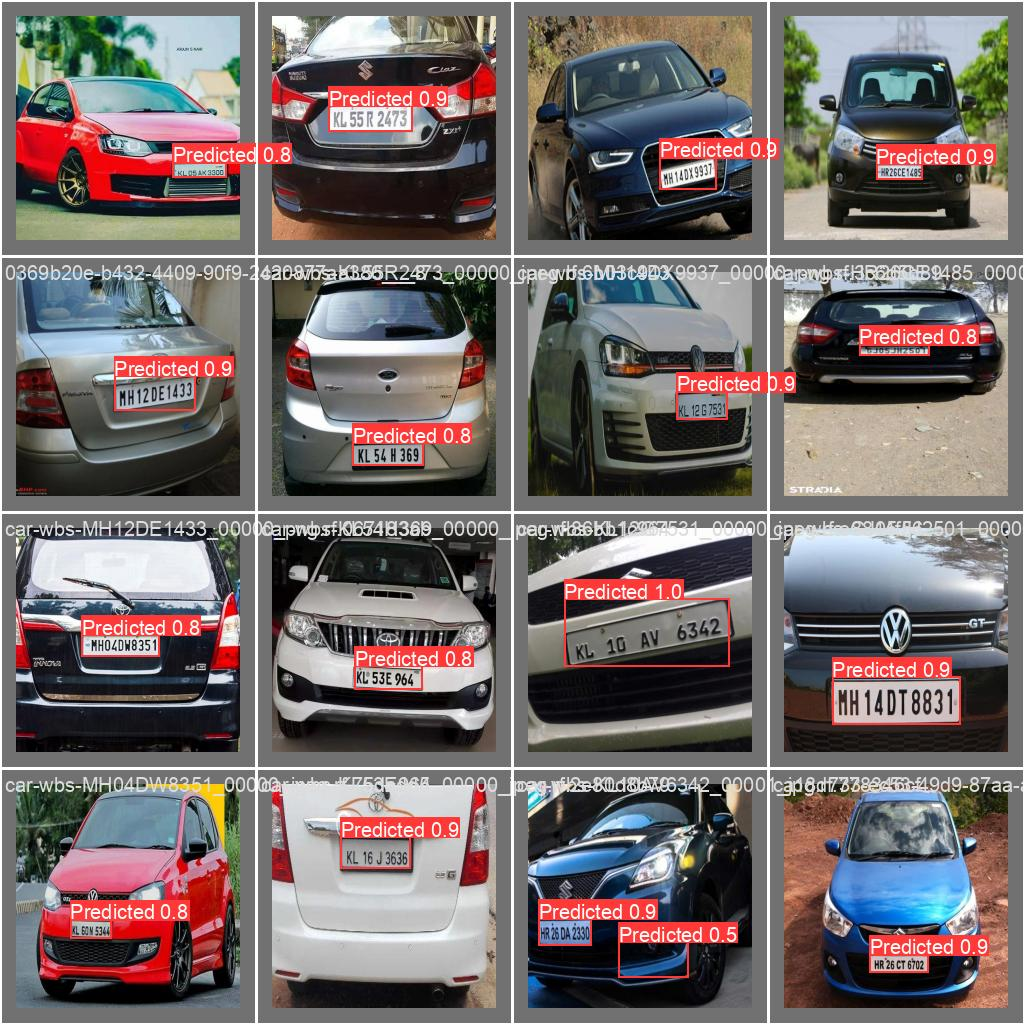

In [12]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2023-11-22 02:56:14.361290: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 02:56:14.361346: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 02:56:14.361384: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 02:56:15.387995: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-De

## Inference with Custom Model

In [19]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main/demo2.jpeg' hide_labels=True boxes=False save_crop

2023-11-22 03:05:23.172321: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 03:05:23.172379: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 03:05:23.172420: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 03:05:24.440285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/utils/plottin

**NOTE:** Let's take a look at few results.

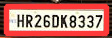

In [20]:
import glob
from IPython.display import Image, display
import cv2

for image_path in glob.glob('runs/detect/predict/crops/Predicted/*.jpg')[:]:
      img = cv2.imread(image_path)
      cv2.imwrite('runs/detect/predict/crops/output.jpg',img)
      display(Image(filename=image_path, width=600))
      print("\n")

In [21]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.3 MB/s eta 0:00:00


In [22]:
import easyocr
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

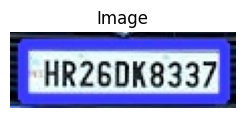

In [23]:
image_path='/content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main/runs/detect/predict/crops/output.jpg'

# Load the image
img = cv2.imread(image_path)


plt.subplot(1, 2, 2)
plt.title('Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.show()

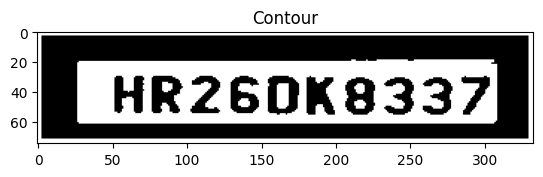

True

In [24]:


# cropped images resize convert into black and white image
img_lp = cv2.resize(img, (333, 75))
img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
_, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img_binary_lp = cv2.erode(img_binary_lp, (3,3))
img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

LP_WIDTH = img_binary_lp.shape[0]
LP_HEIGHT = img_binary_lp.shape[1]

# Make borders white
img_binary_lp[0:3,:] = 255
img_binary_lp[:,0:3] = 255
img_binary_lp[72:75,:] = 255
img_binary_lp[:,330:333] = 255

# Estimations of character contours sizes of cropped license plates
dimensions = [LP_WIDTH/6,
                    LP_WIDTH/2,
                    LP_HEIGHT/10,
                    2*LP_HEIGHT/3]
plt.imshow(img_binary_lp, cmap='gray')
plt.title('Contour')
plt.show()
cv2.imwrite('contour.jpg',img_binary_lp)

In [25]:
ocr=easyocr.Reader(['en'])
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main/contour.jpg")


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [29]:
arrival=ocr.readtext(img)
arrival

[([[47, 23], [308, 23], [308, 62], [47, 62]],
  'HR260K8337',
  0.7607105004566386)]

In [30]:
text=arrival[0][1]
text=text.translate({ord(i): None for i in '-+*/%^&$#@! ?/\|,.'})
text


'HR260K8337'

In [31]:

import time
# seconds passed since epoch
seconds = int(time.time())
# convert the time in seconds since the epoch to a readable format
local_time = time.ctime(seconds)
print(seconds,local_time)
print("Local time:", type(local_time))

1700622465 Wed Nov 22 03:07:45 2023
Local time: <class 'str'>


In [32]:
import time
import os

# Get the current time in seconds since the epoch
seconds = int(time.time())

# Convert the time in seconds since the epoch to a readable format
local_time = time.ctime(seconds)
print(seconds, local_time)

path = "/content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main/Vehical_Collection/parked_cars.txt"
check = os.path.isfile(path)
path1 = "/content/drive/MyDrive/Colab Notebooks/YOLO-v8-Object-Detection-main/Vehical_Collection/parking_collection.txt"
check1 = os.path.isfile(path1)

# Check if the file doesn't exist and create it if necessary
if not check:
  open(path, "w")
if not check1:
  open(path1, "w")

# Open the file in read mode
with open(path, 'r') as f:
    all_plate_lines = f.readlines()

store_plate_time = []

# Iterate through the lines to find the text
for ind, s in enumerate(all_plate_lines):
    idx = s.find(text)  # Use find() to check whether the number plate exists in each line
    print(idx)
    if idx >= 0:
        # If the number plate is found in file.txt, extract arrival time and calculate charges
        store_plate_time = s.split(" ",2)
        prev_time_seconds = int(store_plate_time[1])  # Previous time when the car arrived in parking
        total_stay_time_seconds = seconds - prev_time_seconds
        total_amount_to_pay = int(total_stay_time_seconds * (1 / 180))  # 1hr = 20 Rs

        # Store the amount in the new file
        with open(path1, "a") as newfile:
            string = f"{text} {total_amount_to_pay}Rs    From {store_plate_time[2]}    To {local_time}\n"
            newfile.write(string)

        # Remove the line from the original file
        all_plate_lines.pop(ind)

        # Update the original file
        with open(path, "w") as f:
            f.writelines(all_plate_lines)

        break

if not store_plate_time:
    print("Vehicle arrived successfully")
    with open(path, "a") as f:
        string = f"{text} {seconds} {local_time}\n"
        f.write(string)


1700622469 Wed Nov 22 03:07:49 2023
-1
-1
Vehicle arrived successfully


In [33]:
import shutil
shutil.rmtree('runs/detect/predict')